# **Prova 2 - Curso de Extensão: Introdução à Teoria das Probabilidades**

- Professor: Francisco A. Rodrigues  

- Instituto de Ciências Matemáticas e de Computação (ICMC/USP)

- Ângela Silviane Moura Cunha

- 06/02/2023

**Questão 1:** 

Seja a variável aleatória com distribuição de probabilidade: $P(X=10)=0,4; P(X=50)=0,2; P(X=100)=0,4$. Uma amostra com $100$ observações é sorteada. Qual é a probabilidade de que a média amostral ser menor do que $60$?

- Esperança:  

$$E[X] = \mu = \sum_{i=1}^{n} X_iP_i$$
$$E[X] = 10 \cdot 0.4 + 50 \cdot 0.2 + 100 \cdot 0.4=54$$

- Variância:  

$$V(X) = E[X^2] - E[X]^2$$
$$V(X) = \sigma^2 = \sum_{i=1}^{n} \left(X_i^2P_i \right) - E[X]^2$$
$$V(X) = 10^2 \cdot 0.4 + 50^2 \cdot 0.2 + 100^2 \cdot 0.4 - 54^2 = 1624$$

- Probabilidade da média ser menor que 60:  

Transformando $\bar{X}$ para distribuição $Z$:  

$$Z={ { \bar{X} - \mu } \over { \sigma \over \sqrt{n} } } \sim \mathcal{N}(\mu=0,\sigma^2=1)$$  

temos:  

$$P( \bar{X}<60 )=P\left({ { \bar{X} - \mu } \over { \sigma \over \sqrt{n} } } < { { 60 - \mu } \over { \sigma \over \sqrt{n} } } \right)$$  

$$P( \bar{X}<60 )=P\left(Z < { { 60 - \mu } \over { \sigma \over \sqrt{n} } } \right)$$  

$$P( \bar{X}<60 )=P\left(Z < 1.4889 \right)=0.9317398561772103$$  

In [1]:
import scipy.stats as st

# Calcular a esperança e variância:
X = [10, 50, 100]
P = [0.4, 0.2, 0.4]
E = 0
E2 = 0
for i in range(0, len(X)):
    E = E + X[i]*P[i]
    E2 = E2 + (X[i]**2)*P[i]
V = E2-E**2
print("Esperança:", E, "Variância:",V)

# Probabilidade da média ser menor que 60: mu = E, sigma2 = V
n = 100
Z = (60 - E) / (V**0.5 / n**0.5)
Prob = st.norm.cdf(Z)

print("Probabilidade da média ser menor que 60: {}, (Z={:.4f}) ".format(Prob,Z))

Esperança: 54.0 Variância: 1624.0
Probabilidade da média ser menor que 60: 0.9317398561772103, (Z=1.4889) 


- Simulação de amostras de tamanho $n=100$ para verificação da probabilidade da média da amostra ser menor que 60:

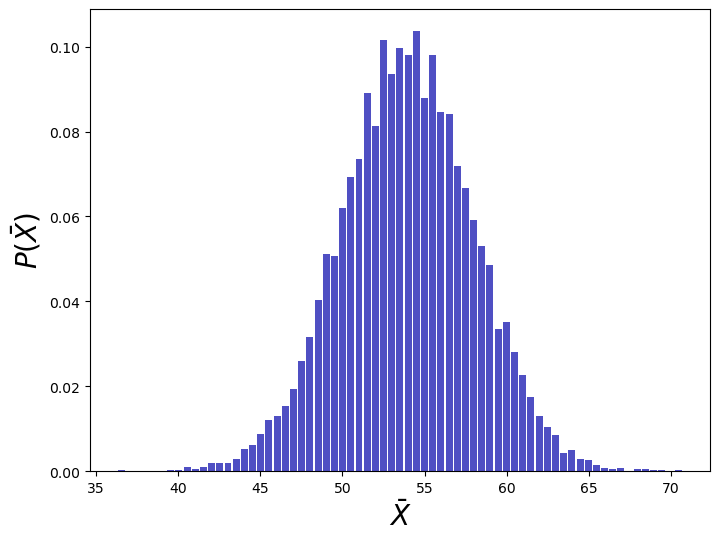

Média das amostras simuladas: 53.9708
Média da população: 54.0000
Probabilidade simulada: P(X < 60) = 0.9322
Valor teórico: P(X < 60) = 0.9317


In [2]:
import numpy as np
import matplotlib.pyplot as plt

ns = 10000 # Número de simulações
vx = [] # Array para armazenar a média amostral
for s in range(0, ns):
    A = np.random.choice(X, n, p=P)
    vx.append(np.mean(A))
nmenor = 0

for i in range(0, len(vx)):
    if(vx[i] < 60):
        nmenor = nmenor + 1
nmenor = nmenor/len(vx)

plt.figure(figsize=(8,6))
plt.hist(x=vx, bins='auto',color='#0504aa', alpha=0.7, rwidth=0.85, density = True)
plt.xlabel(r'$\bar{X}$', fontsize=20)
plt.ylabel(r'$P(\bar{X})$', fontsize=20)
plt.show(True)

print("Média das amostras simuladas: {:.4f}".format(np.mean(vx)))
print("Média da população: {:.4f}".format(E))

print("Probabilidade simulada: P(X < 60) = {:.4f}".format(nmenor))
print("Valor teórico: P(X < 60) = {:.4f}".format(Prob))

**Questão 2:** 

Seja a função densidade de probabilidade conjunta de $(X,Y)$.  
  
$f(x,y) = $ 
\begin{cases}
\frac{e^{-x/y}e^{-y}}{y}, & 0 < x < \infty, 0 < y < \infty \\   
0, & caso \: contrario.
\end{cases}   

Calcule $E[X|Y = y]$.

A esperança condicional de uma variável aleatória $(X,Y)$ é definida por:  

$$E[X|Y=y] = \int_{-\infty}^{\infty}{xf(x|y)dx}$$  

$$f(x|y) = { f(x,y) \over f_Y(y) }$$  
  
Então as distribuições marginais de $X$ e $Y$ são:
  
$$f_X(x) = g(x) = \int_{-\infty}^{\infty}{f(x,y)dy}$$  
  
$$f_Y(y) = h(y) = \int_{-\infty}^{\infty}{f(x,y)dx}$$

Então $E[X|Y=y]$ será:  
  
$$E[X|Y=y] = \int_{0}^{\infty} x { f(x,y) \over f_Y(y) }dx$$

$$E[X|Y=y] = \int_{0}^{\infty} x { { e^{-x/y}e^{-y} \over y } \over \int_{0}^{\infty}{ { e^{-x/y}e^{-y} \over y } dx} }dx = y$$  
  
Resolvendo pelo Wolfram:
  
> $E[X|Y=y]$: Integrate[xDivide[Divide[Power[e,-Divide[x,y]]Power[e,-y],y],Integrate[Divide[Power[e,-Divide[x,y]]Power[e,-y],y],{x,0,∞}]],{x,0,∞}]  


**Questão 3:** 

Seja a variável aleatória bidimensional $(X,Y)$ com função densidade de probabilidade conjunta:.  
  
$$
f(x,y) = 
   \begin{cases}
      { c(xy+e^{-x}) } & \mbox{ se $0 \le x \le 1, \quad 0 \le y \le 1$ }\\  
      {0} & \mbox{ caso contrário }
   \end{cases}
$$  

Determine o valor da constante $c$ e calcule $P(Y < 1/4)$.

a) Valor da constante $c$:  
  
$$\int_{0}^{1}\int_{0}^{1}c(xy+e^{-x})dydx = 1$$  
  
$$c\int_{0}^{1}\int_{0}^{1}(xy+e^{-x})dydx = 1$$  
  
$$c={1 \over \int_{0}^{1}\int_{0}^{1}(xy+e^{-x})dydx } = {1 \over \left({5 \over 4} - {1 \over e} \right)} = 1.1336318941800703$$  
  
  Resolvendo pelo Wolfram:

  > $c$: Divide[1,Integrate[\(40)xy+exp\(40)-x\(41)\(41),{y,0,1},{x,0,1}]]

b) Probabilidade $P(Y < 1/4)$:  
  
$$P(Y<1/4) = \int_{0}^{1}\int_{0}^{1/4}f(x,y)dydx$$
  
$$P(Y<1/4) = \int_{0}^{1}\int_{0}^{1/4}c(xy+e^{-x})dydx$$  
  
$$P(Y<1/4) = c\int_{0}^{1}\int_{0}^{1/4}(xy+e^{-x})dydx = c\left({17 \over 64} - {1 \over 4e} \right)=0.1968610049603092$$

Resolvendo pelo Wolfram:

  > $P(Y<1/4)$: cIntegrate[\(40)xy+exp\(40)-x\(41)\(41),{y,0,Divide[1,4]},{x,0,1}]  

In [3]:
import math 

# a) valor de c
c = 1/(5/4-1/math.exp(1))
print("c = {}".format(c))

# b) valor de P(Y<1/4)
P = c*(17/64-1/(4*math.exp(1)))
print("P(1<1/4) = {}".format(P))

c = 1.1336318941800703
P(1<1/4) = 0.1968610049603092
